In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
from google.colab import files
uploaded = files.upload()

Saving advertising.csv.xls to advertising.csv (2).xls


In [41]:
data = pd.read_csv('advertising.csv.xls')
data.columns = data.columns.str.strip()


In [42]:
print(data.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [43]:
print(data.isnull().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


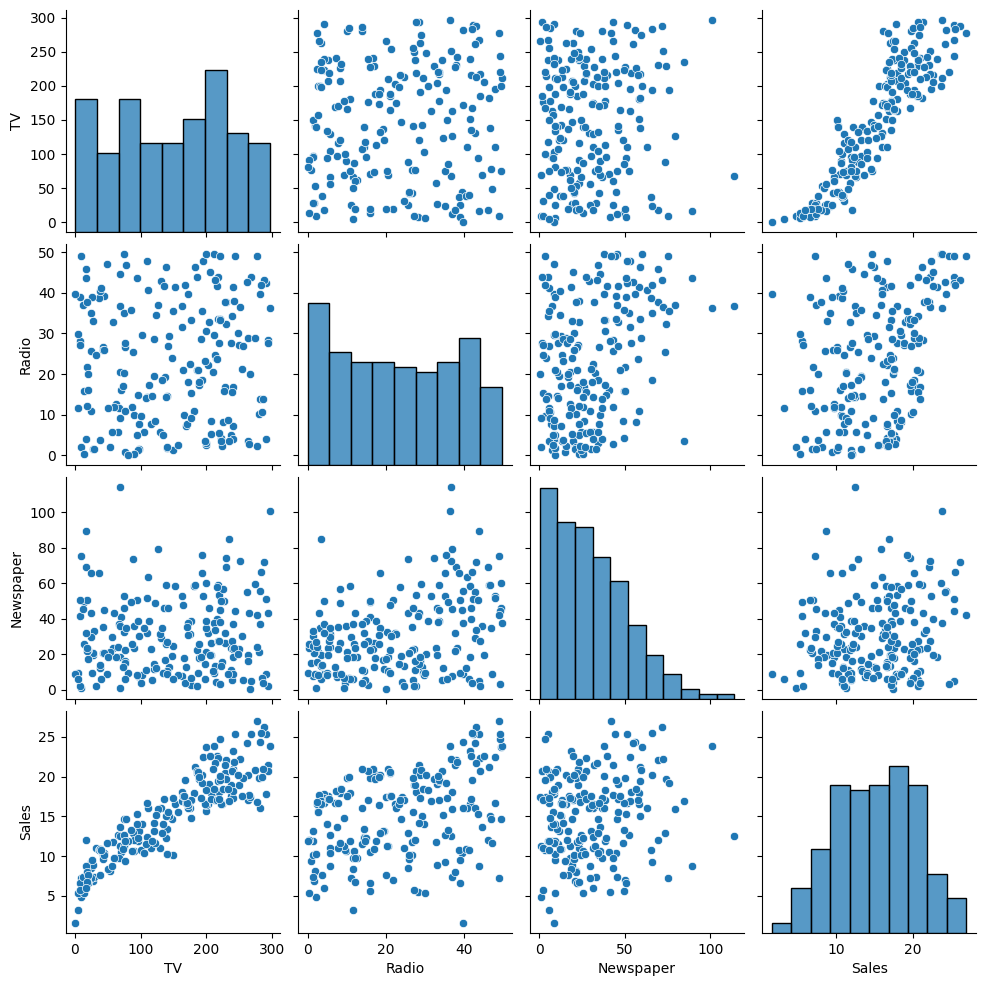

In [44]:
sns.pairplot(data)
plt.show()

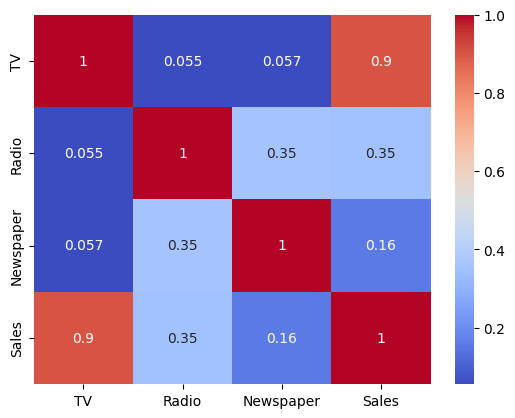

In [45]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [46]:
X = data.drop('Sales', axis=1)   # Features
y = data['Sales']                # Target

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [49]:
y_pred = model.predict(X_test)

In [50]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 2.9077569102710896
R2 Score: 0.9059011844150826


In [51]:
results = pd.DataFrame({'Actual Sales': y_test, 'Predicted Sales': y_pred})
print(results.head())

     Actual Sales  Predicted Sales
95           16.9        17.034772
15           22.4        20.409740
30           21.4        23.723989
158           7.3         9.272785
128          24.7        21.682719


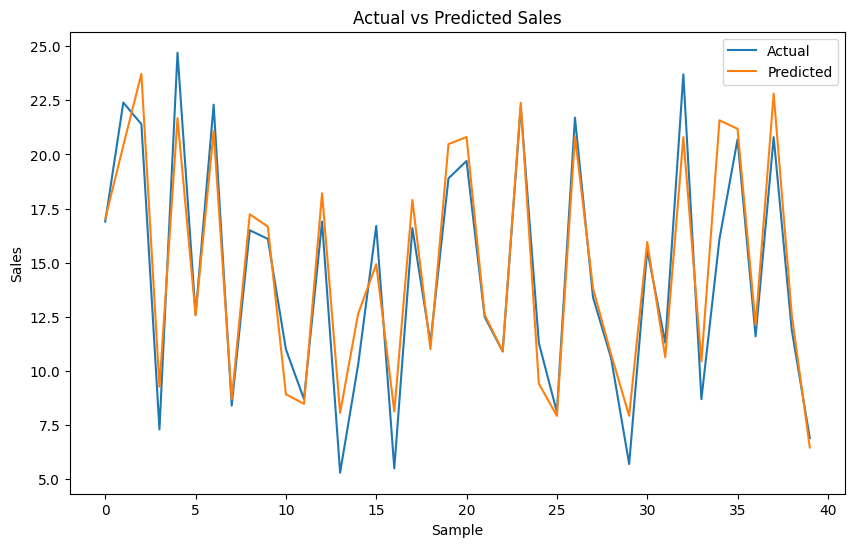

In [52]:
plt.figure(figsize=(10,6))
plt.plot(results['Actual Sales'].values, label='Actual')
plt.plot(results['Predicted Sales'].values, label='Predicted')
plt.legend()
plt.title("Actual vs Predicted Sales")
plt.xlabel("Sample")
plt.ylabel("Sales")
plt.show()